In [59]:
"""
This is just a rough skeleton to assist you in understanding the process flow. 
Modify it to meet the requirements of the questions. 

Put the description paragraph here
DESCRIPTION OF IMPLEMENTATION:

Firstly, to prepare the data, I shuffled the index of the data, then used this index to shuffle the data. 
Then partition them into equal k=5 folds.
And, save them into the dictionary X_shuffled and y_shuffled respectively.

Then set itr as the parameter that the key whose value will be chosed for the valid data, and the leftover will be the train data.
Where I used the "pop" function to seperate the valid data and the train data and use "np.concatenate" to connection the separated 
train data.

Secondly, in order to train the data, I used the formula proven in the Problem 3 which is the solution of the weights.
Then, I derivated the Ridge Regression Function with intercept and let the derivation equals to 0, then get the solution of intercept.

To valid this method, I uses the X_valid times the weights then plus the intercept to get the y_predict.

Finally, for every lambda, we train the dataset and valid the methon 5 times, and get 5 RMSE, I use their mean value 
as the final RMSE for this lambda method.

Choose different lambda and get different RMSE. Plot RMSE vs lambda.
"""

'\nThis is just a rough skeleton to assist you in understanding the process flow. \nModify it to meet the requirements of the questions. \n\nPut the description paragraph here\nDESCRIPTION OF IMPLEMENTATION:\n\nFirstly, to prepare the date, I shuffled the index of the data, then shuffled the data. Then partition them into equal k=5 folds.\nAnd, save them into the dictionary X_shuffled and y_shuffled respectively.\n\nThen set itr as the parameter that the key whose value will be chosed for the valid data, and the leftover will be the train data.\nWhere I used the "pop" function to seperate the valid data and the train data and use "np.concatenate" to connection the separated \ntrain data.\n\nSecondly, in order to train the data, I used the formula proven in the Problem 3 which is the solution of the weights.\nThen, I derivated the regression with intercept and let the derivation equals to 0, then get the solution of intercept.\n\nTo valid this method, I uses the X_valid times the weight

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# For reading the data you can use either numpy or pandas and accordingly handle your processing. An example could be
# my_data = np.genfromtxt('SPAM-HW1.csv', delimiter=',')
    

In [66]:
house=pd.read_csv("Housing.csv")
#the number of columns of the data 
n=house.shape[0]
#the number of rows of the data
k=house.shape[1]
#the number of the folds
f=5

#shuffle the dataset
np.random.seed(1)
shuffled_index=np.random.permutation(n)
house_shuffled=house.iloc[shuffled_index]

#partition it into equal 5 folds
data=[]
for i in range(1,f+1):
    fold=house_shuffled.iloc[(i-1)*(int(n/f)):i*(int(n/f)),:]
    data.append(fold)

#Save each of the 5 folds into dictionary X_shuffled and y_shuffled
X_shuffled={1:data[0].iloc[:,0:k-1],2:data[1].iloc[:,0:k-1],3:data[2].iloc[:,0:k-1],4:data[3].iloc[:,0:k-1],5:data[4].iloc[:,0:k-1]}
y_shuffled={1:data[0].iloc[:,k-1],2:data[1].iloc[:,k-1],3:data[2].iloc[:,k-1],4:data[3].iloc[:,k-1],5:data[4].iloc[:,k-1]}


In [67]:
def get_next_train_valid(X_shuffled, y_shuffled, itr):
    """
    - itr value can tell you which fold you pick up for valid and rest go to training
    - use 1 fold for validation and all other folds for training
    - in next iteration, use a different fold for validation and remaining folds for training
        
    Basically, here you will determine which fold goes for validation and which ones for training
    """
    #return training and validation data Xtrain, ytrain, Xvalid, yvalid
    #get the valid dataset 
    X_valid=X_shuffled[itr]
    y_valid=y_shuffled[itr]
    
    #get the train dataset
    Xcopy=X_shuffled.copy()
    ycopy=y_shuffled.copy()
    Xcopy.pop(itr)
    ycopy.pop(itr)
    Xtrain=Xcopy
    ytrain=ycopy
    #to get Xtrain
    X_train=np.zeros((1,k-1))
    for key in Xtrain:
        X_train=np.concatenate((X_train,Xtrain[key]),axis = 0)
    
    X_train=np.delete(X_train,0,axis = 0)
    
    #to get y_train
    y_train=np.zeros((1))
    for key in ytrain:
        y_train=np.concatenate((y_train,ytrain[key]),axis = 0)
    
    y_train=np.delete(y_train,0,axis = 0)
    
    
    return(X_train,y_train,X_valid,y_valid)

In [68]:
def train(X_train,y_train, lamda):
    """
    This function should implement fitting or training your model in question. 
    """
    # return model
    
    #weights
    model_weights=np.linalg.inv(X_train.T.dot(X_train)+lamda*np.identity(k-1)).dot(X_train.T).dot(y_train)
    #intercept
    model_intercept=(sum(y_train)-sum(X_train.dot(model_weights)))/((1-1/f)*n)
   
    return(model_weights, model_intercept)

In [69]:
def predict(X_valid, model_weights, model_intercept):
    """
    Here, using the trained model, implement how to predict when you just have feature vector. 
    """
    # return 
    y_predict=X_valid.dot(model_weights)+model_intercept
    return(y_predict)

In [70]:
def RMSE(lamda):
    """
    Use all the functions above: get the train data and valid data; train the model; get the predict; finally 
    computer the RMSE for every fold and use their mean value as the RMSE of this lambda method. 
    """
    rmse=np.zeros((f))
    for i in range(1,f+1):
        X_train,y_train,X_valid,y_valid=get_next_train_valid(X_shuffled, y_shuffled, i)
        model_weights, model_intercept=train(X_train,y_train, lamda)
        y_predict=predict(X_valid, model_weights, model_intercept)
        rmse[i-1]=np.sqrt(np.mean((y_predict-y_valid)**2))
        
    RMSE=np.mean(rmse)
    
    return(RMSE)    

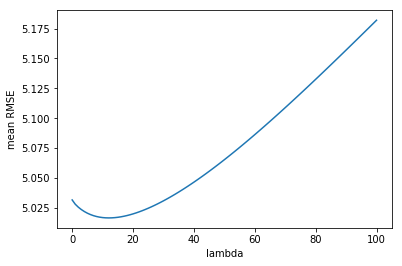

In [71]:
lamd=np.zeros((101))
Rmse=np.zeros((101))
for j in range(0,101):
    lamd[j]=j
    Rmse[j]=RMSE(j)

plt.plot(lamd,Rmse)
plt.xlabel('lambda'); 
plt.ylabel('mean RMSE'); 
plt.show()    

In [51]:
"""
Main - Here goes the overall logic.
"""
# cross-validation to get train and validation data
# We will use cross validation for training and validation. In this assignment, we will not use test split separately.
#  Let us say we want k-fold with k=5 - shuffle the data and partition into k-equal partitions
#  Save paritions into dictionaries

#Loop through 5 times, each time selecting 1 fold as validation and remaining as train data sets using function get_next_train_valid 
#   train your model
#   predict target on validation and training
#   compute error i.e. RMSE or classification accuracy as per assignment question
#
#Plot or print as per question - Mean RMSE or accuracy

'\nMain - Here goes the overall logic.\n'